### Data prepatation

In [1]:
# Some required libraries 
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# A first function to dowlnload the datasets
def loadCsv(path):
    data = []
    with open(path, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            data.append(np.array(row))
    data = np.array(data)
    (n, d) = data.shape
    return data, n, d

# Encode Categorical variables
def oneHotEncodeColumns(data, columnsCategories):
    dataCategories = data[:, columnsCategories]
    dataEncoded = OneHotEncoder(sparse=False).fit_transform(dataCategories)
    columnsNumerical = []
    for i in range(data.shape[1]):
        if i not in columnsCategories:
            columnsNumerical.append(i)
    dataNumerical = data[:, columnsNumerical]
    return np.hstack((dataNumerical, dataEncoded)).astype(float)

# Another function to prepare the data
def data_recovery(dataset):
    if dataset in ['abalone8', 'abalone17', 'abalone20']:
        data = pd.read_csv("datasets/abalone.data", header=None)
        data = pd.get_dummies(data, dtype=float)
        if dataset in ['abalone8']:
            y = np.array([1 if elt == 8 else 0 for elt in data[8]])
        elif dataset in ['abalone17']:
            y = np.array([1 if elt == 17 else 0 for elt in data[8]])
        elif dataset in ['abalone20']:
            y = np.array([1 if elt == 20 else 0 for elt in data[8]])
        X = np.array(data.drop([8], axis=1))
    elif dataset in ['autompg']:
        data = pd.read_csv("datasets/auto-mpg.data", header=None, sep=r'\s+')
        data = data.replace('?', np.nan)
        data = data.dropna()
        data = data.drop([8], axis=1)
        data = data.astype(float)
        y = np.array([1 if elt in [2, 3] else 0 for elt in data[7]])
        X = np.array(data.drop([7], axis=1))
    elif dataset in ['australian']:
        data, n, d = loadCsv('datasets/australian.data')
        X = data[:, np.arange(d-1)].astype(float)
        y = data[:, d-1].astype(int)
        y[y != 1] = 0
    elif dataset in ['balance']:
        data = pd.read_csv("datasets/balance-scale.data", header=None)
        y = np.array([1 if elt in ['L'] else 0 for elt in data[0]])
        X = np.array(data.drop([0], axis=1))
    elif dataset in ['bankmarketing']:
        data, n, d = loadCsv('datasets/bankmarketing.csv')
        X = data[:, np.arange(0, d-1)]
        X = oneHotEncodeColumns(X, [1, 2, 3, 4, 6, 7, 8, 10, 15])
        y = data[:, d-1]
        y[y == "no"] = "0"
        y[y == "yes"] = "1"
        y = y.astype(int)
    elif dataset in ['bupa']:
        data, n, d = loadCsv('datasets/bupa.dat')
        X = data[:, np.arange(d-1)].astype(float)
        y = data[:, d-1].astype(int)
        y[y != 1] = 0
    elif dataset in ['german']:
        data = pd.read_csv("datasets/german.data-numeric", header=None,
                           sep=r'\s+')
        y = np.array([1 if elt == 2 else 0 for elt in data[24]])
        X = np.array(data.drop([24], axis=1))
    elif dataset in ['glass']:
        data = pd.read_csv("datasets/glass.data", header=None, index_col=0)
        y = np.array([1 if elt == 1 else 0 for elt in data[10]])
        X = np.array(data.drop([10], axis=1))
    elif dataset in ['hayes']:
        data = pd.read_csv("datasets/hayes-roth.data", header=None)
        y = np.array([1 if elt in [3] else 0 for elt in data[5]])
        X = np.array(data.drop([0, 5], axis=1))
    elif dataset in ['heart']:
        data, n, d = loadCsv('datasets/heart.data')
        X = data[:, np.arange(d-1)].astype(float)
        y = data[:, d-1]
        y = y.astype(int)
        y[y != 2] = 0
        y[y == 2] = 1
    elif dataset in ['iono']:
        data = pd.read_csv("datasets/ionosphere.data", header=None)
        y = np.array([1 if elt in ['b'] else 0 for elt in data[34]])
        X = np.array(data.drop([34], axis=1))
    elif dataset in ['libras']:
        data = pd.read_csv("datasets/movement_libras.data", header=None)
        y = np.array([1 if elt in [1] else 0 for elt in data[90]])
        X = np.array(data.drop([90], axis=1))
    elif dataset == "newthyroid":
        data, n, d = loadCsv('datasets/newthyroid.dat')
        X = data[:, np.arange(d-1)].astype(float)
        y = data[:, d-1].astype(int)
        y[y < 2] = 0
        y[y >= 2] = 1
    elif dataset in ['pageblocks']:
        data = pd.read_csv("datasets/page-blocks.data", header=None,
                           sep=r'\s+')
        y = np.array([1 if elt in [2, 3, 4, 5] else 0 for elt in data[10]])
        X = np.array(data.drop([10], axis=1))
    elif dataset in ['pima']:
        data, n, d = loadCsv('datasets/pima-indians-diabetes.data')
        X = data[:, np.arange(d-1)].astype(float)
        y = data[:, d-1]
        y[y != '1'] = '0'
        y = y.astype(int)
    elif dataset in ['satimage']:
        data, n, d = loadCsv('datasets/satimage.data')
        X = data[:, np.arange(d-1)].astype(float)
        y = data[:, d-1]
        y = y.astype(int)
        y[y != 4] = 0
        y[y == 4] = 1
    elif dataset in ['segmentation']:
        data, n, d = loadCsv('datasets/segmentation.data')
        X = data[:, np.arange(1, d)].astype(float)
        y = data[:, 0]
        y[y == "WINDOW"] = '1'
        y[y != '1'] = '0'
        y = y.astype(int)
    elif dataset == "sonar":
        data, n, d = loadCsv('datasets/sonar.dat')
        X = data[:, np.arange(d-1)].astype(float)
        y = data[:, d-1]
        y[y != 'R'] = '0'
        y[y == 'R'] = '1'
        y = y.astype(int)
    elif dataset == "spambase":
        data, n, d = loadCsv('datasets/spambase.dat')
        X = data[:, np.arange(d-1)].astype(float)
        y = data[:, d-1].astype(int)
        y[y != 1] = 0
    elif dataset == "splice":
        data, n, d = loadCsv('datasets/splice.data')
        X = data[:, np.arange(1, d)].astype(float)
        y = data[:, 0].astype(int)
        y[y == 1] = 2
        y[y == -1] = 1
        y[y == 2] = 0
    elif dataset in ['vehicle']:
        data, n, d = loadCsv('datasets/vehicle.data')
        X = data[:, np.arange(d-1)].astype(float)
        y = data[:, d-1]
        y[y != "van"] = '0'
        y[y == "van"] = '1'
        y = y.astype(int)
    elif dataset in ['wdbc']:
        data, n, d = loadCsv('datasets/wdbc.dat')
        X = data[:, np.arange(d-1)].astype(float)
        y = data[:, d-1]
        y[y != 'M'] = '0'
        y[y == 'M'] = '1'
        y = y.astype(int)
    elif dataset in ['wine']:
        data = pd.read_csv("datasets/wine.data", header=None)
        y = np.array([1 if elt == 1 else 0 for elt in data[0]])
        X = np.array(data.drop([0], axis=1))
    elif dataset in ['wine4']:
        data = pd.read_csv("datasets/winequality-red.csv", sep=';')
        y = np.array([1 if elt in [4] else 0 for elt in data.quality])
        X = np.array(data.drop(["quality"], axis=1))
    elif dataset in ['yeast3', 'yeast6']:
        data = pd.read_csv("datasets/yeast.data", header=None, sep=r'\s+')
        data = data.drop([0], axis=1)
        if dataset == 'yeast3':
            y = np.array([1 if elt == 'ME3' else 0 for elt in data[9]])
        elif dataset == 'yeast6':
            y = np.array([1 if elt == 'EXC' else 0 for elt in data[9]])
        X = np.array(data.drop([9], axis=1))
    return X, y

### Data loading

c:\Users\mathis.dousse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


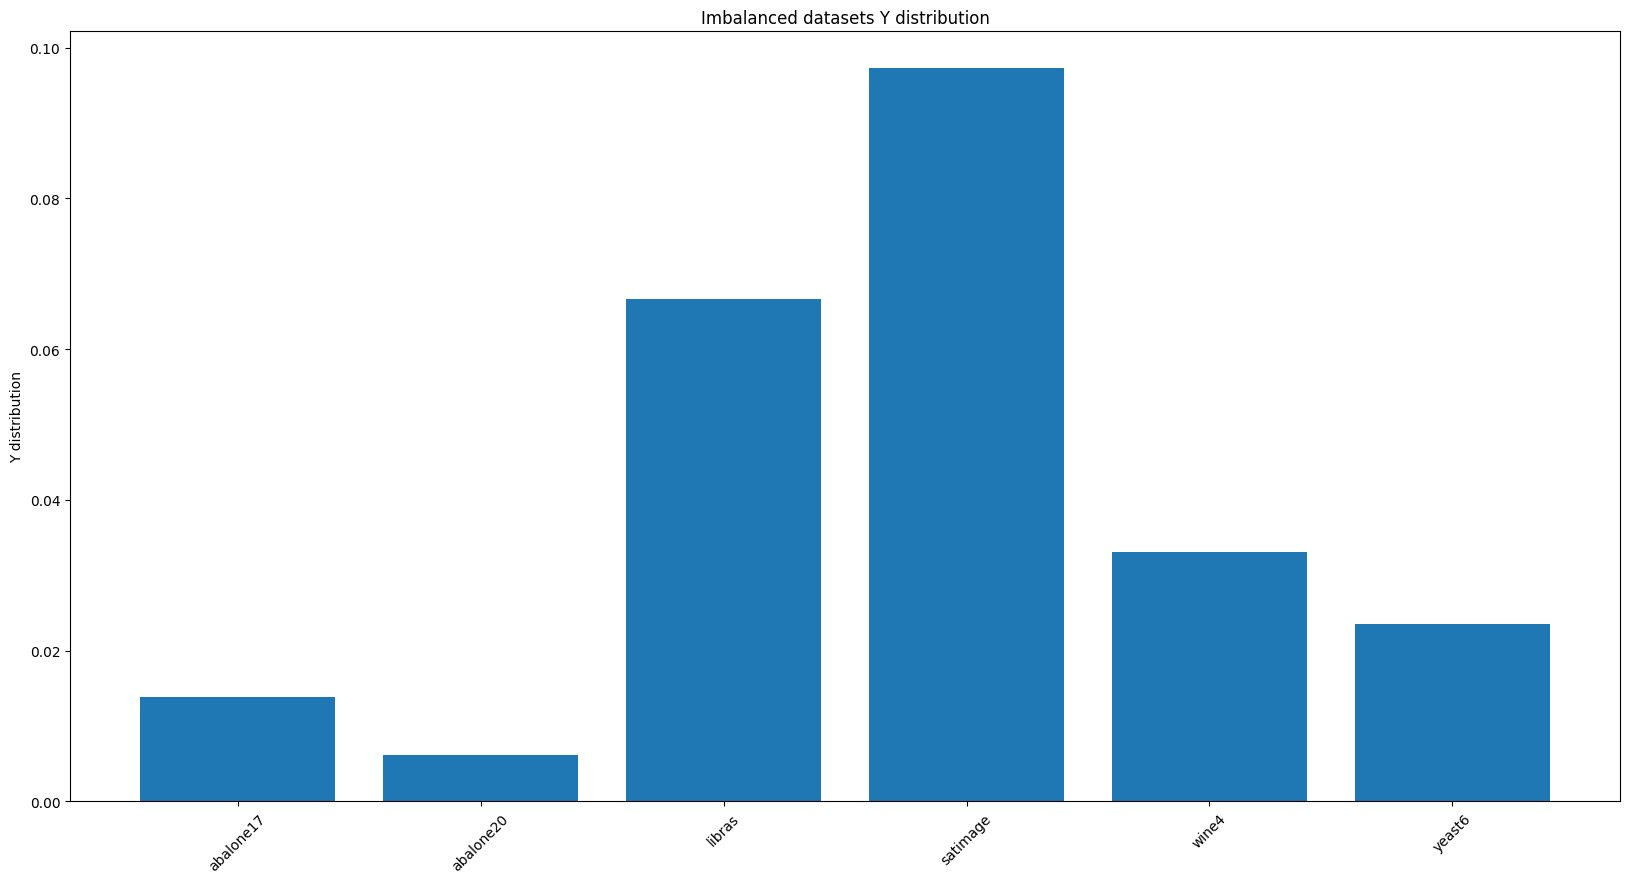

In [28]:
from dataset import Dataset
import matplotlib.pyplot as plt

dataset_names = ['abalone8', 'abalone17', 'abalone20', 'autompg', 'australian',
            'balance', 'bankmarketing', 'bupa', 'german', 'glass', 'hayes',
            'heart', 'iono', 'libras', 'newthyroid', 'pageblocks', 'pima',
            'satimage', 'segmentation', 'sonar', 'spambase', 'splice',
            'vehicle', 'wdbc', 'wine', 'wine4', 'yeast3', 'yeast6']

datasets = {
    "name":[],
    "X":[],
    "y":[],
    "balanced":[]
}

for dataset_name in dataset_names:
    X, y = data_recovery(dataset_name)
    datasets["name"].append(dataset_name)
    datasets["X"].append(X)
    datasets["y"].append(y)
    datasets["balanced"].append(np.mean(y) > 0.1)

datasets = pd.DataFrame(datasets)
# plot datasets imbalanced datasets Y distribution
plt.figure(figsize=(20,10))
plt.bar(datasets[datasets["balanced"] == False]["name"], datasets[datasets["balanced"] == False]["y"].apply(np.mean))
plt.xticks(rotation=45)
plt.ylabel("Y distribution")
plt.title("Imbalanced datasets Y distribution")
plt.show()

### Data analyse

In [42]:
# import test_train_split
from sklearn.model_selection import train_test_split

# import the classifiers
from sklearn.linear_model import LogisticRegression

# import the metrics
from sklearn.metrics import accuracy_score, f1_score

clf_l1 = LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
clf_l2 = LogisticRegression(penalty='l2', random_state=0)
clf_en = LogisticRegression(penalty='elasticnet', random_state=0, solver='saga', l1_ratio=0.5)

clfs = {
    "LogisticRegression_l1": clf_l1,
    "LogisticRegression_l2": clf_l2,
    "LogisticRegression_en": clf_en,
}

res = {
    "name":[],
    "clf":[],
    "score":[],
    "cross_validation":[]
}

balanced = datasets.loc[datasets["balanced"] == True].iloc[5]
imbalanced = datasets.loc[datasets["balanced"] == False].iloc[0]
df = []
df.append(balanced)
df.append(imbalanced)

for d in df:
    X_train, X_test, y_train, y_test = train_test_split(d["X"], d["y"], test_size=0.2, random_state=42)
    
    print(d["name"])
    for key,clf in clfs.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score_type = ""
        if d["balanced"] == True:
            score = accuracy_score(y_test, y_pred)
            score_type = "accuracy"
        else:
            score = f1_score(y_test, y_pred, average='micro')
            score_type = "f1"
        print(key, score_type ,score)


bupa
LogisticRegression_l1 accuracy 0.7536231884057971
LogisticRegression_l2 accuracy 0.7246376811594203
LogisticRegression_en accuracy 0.7246376811594203
abalone17
LogisticRegression_l1 f1 0.9904306220095693
LogisticRegression_l2 f1 0.9904306220095693
LogisticRegression_en f1 0.9904306220095693


c:\Users\mathis.dousse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [57]:
# import the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# import cross validation
from sklearn.model_selection import cross_val_score

# import the metrics
from sklearn.metrics import accuracy_score, f1_score

# import time to measure the time
import time


clf_l1 = LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
svm = SVC(random_state=0)
decision_tree = DecisionTreeClassifier(random_state=0)

clfs = {
    "LogisticRegression_l1": clf_l1,
    "SVM": svm,
    "DecisionTree": decision_tree,
}

table = {
    "dataset": [],
    "classifiers": [],
    "score": [],
    "time": [],
    "cross_val_score": [],
    "balanced": []
}


for d in datasets.to_dict(orient="records"):
    X_train, X_test, y_train, y_test = train_test_split(d["X"], d["y"], test_size=0.2, random_state=42)
    for key,clf in clfs.items():
        table["dataset"].append(d["name"])
        start = time.time()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        end = time.time()
        score = ""
        if d["balanced"] == True:
            score = accuracy_score(y_test, y_pred)
        else:
            score = f1_score(y_test, y_pred, average='micro')
        table["score"].append(score)
        cross_val = cross_val_score(clf, X_train, y_train, cv=5).mean()
        table["classifiers"].append(key)
        table["time"].append(end-start)
        table["cross_val_score"].append(cross_val)
        table["balanced"].append("balanced" if d["balanced"] else "imbalanced")

table = pd.DataFrame(table)
table.to_csv("table.csv", sep=';', encoding='utf-8')

c:\Users\mathis.dousse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mathis.dousse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mathis.dousse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mathis.dousse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\mathis.dousse\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, in

PermissionError: [Errno 13] Permission denied: 'table.csv'

In [62]:
# import the classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

bagging = BaggingClassifier(random_state=0)
random_forest = RandomForestClassifier(random_state=0)
adaboost = AdaBoostClassifier(random_state=0)

clfs = {
    "Bagging": bagging,
    "RandomForest": random_forest,
    "AdaBoost": adaboost,
}

table = {
    "dataset": [],
    "classifiers": [],
    "score": [],
    "time": [],
    "cross_val_score": [],
    "balanced": []
}

# create a dataframe of bupa, heart, sonar, german, australian , heart
df = []
df.append(datasets.loc[datasets["name"] == "bupa"].iloc[0])
df.append(datasets.loc[datasets["name"] == "heart"].iloc[0])
df.append(datasets.loc[datasets["name"] == "sonar"].iloc[0])
df.append(datasets.loc[datasets["name"] == "german"].iloc[0])
df.append(datasets.loc[datasets["name"] == "australian"].iloc[0])
df.append(datasets.loc[datasets["name"] == "heart"].iloc[0])

for d in df:
    X_train, X_test, y_train, y_test = train_test_split(d["X"], d["y"], test_size=0.2, random_state=42)
    for key,clf in clfs.items():
        table["dataset"].append(d["name"])
        start = time.time()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        end = time.time()
        score = ""
        if d["balanced"] == True:
            score = accuracy_score(y_test, y_pred)
        else:
            score = f1_score(y_test, y_pred, average='micro')
        table["score"].append(score)
        cross_val = cross_val_score(clf, X_train, y_train, cv=5).mean()
        table["classifiers"].append(key)
        table["time"].append(end-start)
        table["cross_val_score"].append(cross_val)
        table["balanced"].append("balanced" if d["balanced"] else "imbalanced")

table = pd.DataFrame(table)
table.to_csv("table2.csv", sep=';', encoding='utf-8')